In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('Canada_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/1174222393432136530,The Impérial Suite + Parking + AC,Located in the heart of the action on rue Sain...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Johan,2019-01-15,within an hour,100%,t,...,4.95,4.97,5.00,4.70,4.81,10.0,10.0,0.0,0.0,7.82
1,https://www.airbnb.com/rooms/42687485,206 - Les Lofts 1048,Situated in a lovely historic building in the ...,"Old Québec, a UNESCO world heritage treasure, ...",https://a0.muscache.com/pictures/656ff41c-4875...,Reception From Lofts Vieux-Québec,2014-11-13,Desconocido,-%,f,...,5.00,4.92,4.75,5.00,4.83,6.1,4.3,0.0,0.0,0.24
2,https://www.airbnb.com/rooms/1209738868029751192,Appartement complet -Haute-ville,The whole group will enjoy quick and easy acce...,No se proporcionan detalles,https://a0.muscache.com/pictures/hosting/Hosti...,Mathieu,2020-06-05,Desconocido,-%,f,...,5.00,5.00,5.00,4.80,4.70,2.0,1.0,0.0,0.0,2.40
3,https://www.airbnb.com/rooms/50586493,Loft in the old city 12,Luxurious and modern loft in the heart of the ...,No se proporcionan detalles,https://a0.muscache.com/pictures/eeac0775-4692...,Maxime,2015-08-05,within an hour,100%,f,...,4.80,4.71,4.64,4.93,4.50,7.0,7.0,0.0,0.0,0.36
4,https://www.airbnb.com/rooms/138381,Bed & Breakfast La California kudu,This home away from home is a superb pied-à-te...,"Located on chemin Saint-Louis, near the Siller...",https://a0.muscache.com/pictures/3d1d51d0-5e04...,Mary,2011-06-07,within an hour,100%,f,...,4.95,4.94,4.96,4.82,4.92,3.0,0.0,0.0,0.0,1.08


In [4]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,100%,t,t,Entire rental unit,Entire home/apt,f,6.0,1.0,138.0,4.95
1,-%,f,t,Entire loft,Entire home/apt,f,2.0,1.0,229.0,5.00
2,-%,f,f,Entire rental unit,Entire home/apt,t,4.0,1.0,143.2,5.00
3,100%,f,t,Entire loft,Entire home/apt,t,2.0,1.0,143.2,4.80
4,100%,f,t,Private room in bed and breakfast,Private room,f,3.0,1.0,185.0,4.95
...,...,...,...,...,...,...,...,...,...,...
2312,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,48.0,5.00
2313,-%,f,t,Entire rental unit,Entire home/apt,f,4.0,1.0,101.0,5.00
2314,100%,f,t,Entire condo,Entire home/apt,t,6.0,1.0,143.2,4.52
2315,100%,f,t,Entire rental unit,Entire home/apt,f,2.0,1.0,76.0,4.75


In [5]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\MaFer\AppData\Local\Temp\ipykernel_9604\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_9604\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_9604\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

In [6]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]
#f3 = Private room
f3= f1[(f1["room_type"] == 2)]
#f4 = Shared room
f4= f1[(f1["room_type"] == 3)]
#f5 = Hotel room
f5= f1[(f1["room_type"] == 4)]

<Axes: xlabel='room_type', ylabel='price'>

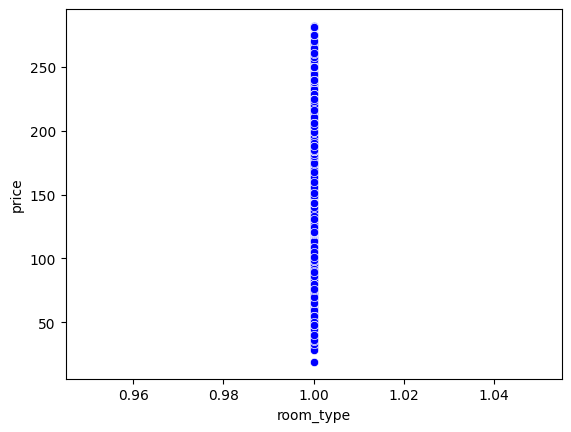

In [7]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='room_type',y='price', color="blue", data=f2)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_response_rate', ylabel='price'>

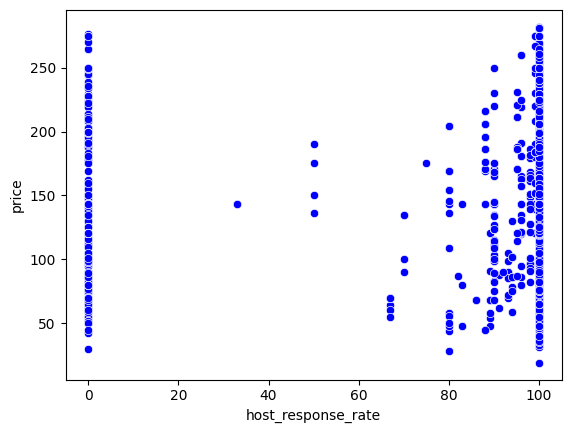

In [8]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_response_rate',y='price', color="blue", data=f2)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

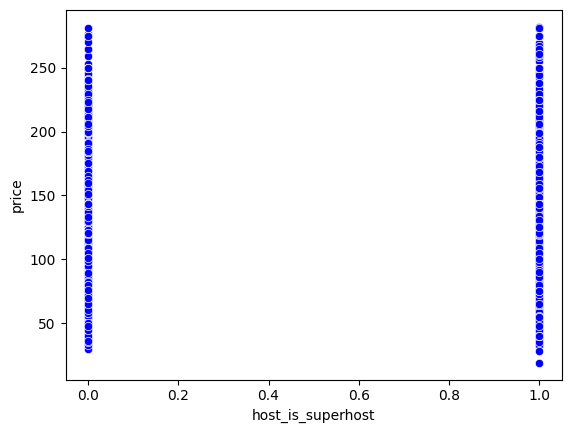

In [9]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_is_superhost',y='price', color="blue", data=f2)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

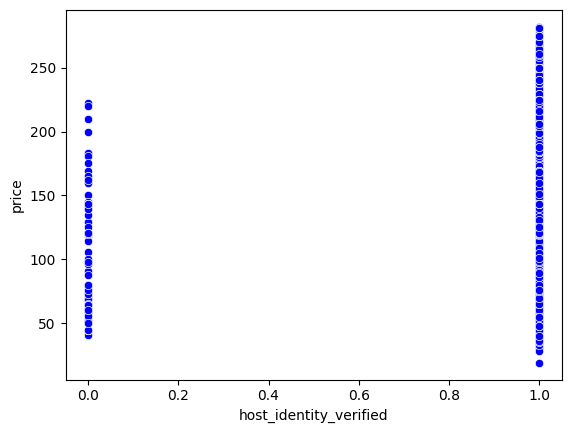

In [10]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_identity_verified',y='price', color="blue", data=f2)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

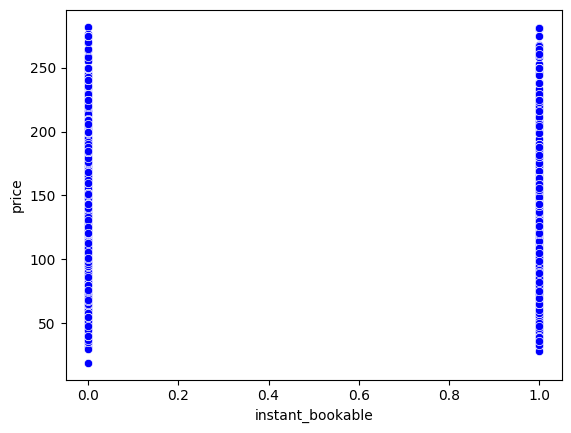

In [11]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='instant_bookable',y='price', color="blue", data=f2)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

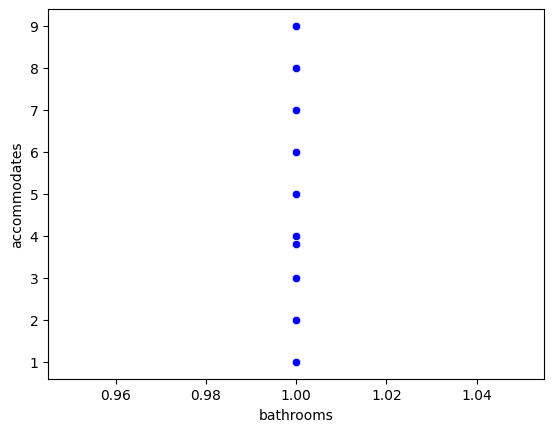

In [12]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='bathrooms',y='accommodates', color="blue", data=f2)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

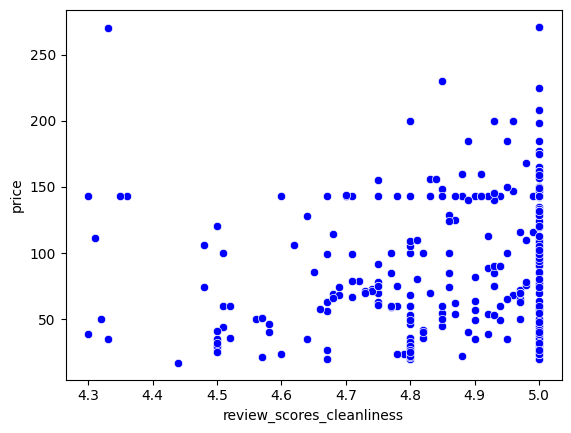

In [13]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='review_scores_cleanliness',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)


In [14]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= f2 [['room_type']]
Vars_Dep= f2 ['price']

In [15]:
Vars_Indep2= f2 [['host_response_rate']]
Vars_Dep2= f2 ['price']

In [16]:
Vars_Indep3= f2 [['host_is_superhost']]
Vars_Dep3= f2 ['price']

In [17]:
Vars_Indep4= f2 [['host_identity_verified']]
Vars_Dep4= f2 ['price']

In [18]:
Vars_Indep5= f2 [['instant_bookable']]
Vars_Dep5= f2 ['price']

In [19]:
Vars_Indep6= f2 [['bathrooms']]
Vars_Dep6= f2 ['accommodates']

In [20]:
Vars_Indep7= f2 [['review_scores_cleanliness']]
Vars_Dep7= f2 ['price']

In [21]:
Vars_Indep8= f2 [['property_type']]
Vars_Dep8= f2 ['price']

In [22]:
#Se definie model (para room_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [23]:
#Se definie model (para host_response_rate) como función regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [24]:
#Se definie model (para host_is_superhost) como función regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [25]:
#Se definie model (para host_identity_verified) como función regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [26]:
#Se definie model (para instant_bookable) como función regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [27]:
#Se definie model (para bathrooms) como función regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [28]:
#Se definie model (para review_scores_cleanliness) como función regresión lineal
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [29]:
#Se definie model (para property_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [30]:
#Verficamos la función relacionada al modela
type(model)

sklearn.linear_model._base.LinearRegression

In [31]:
#Verficamos la función relacionada al modela
type(model2)

sklearn.linear_model._base.LinearRegression

In [32]:
#Verficamos la función relacionada al modela
type(model3)

sklearn.linear_model._base.LinearRegression

In [33]:
#Verficamos la función relacionada al modela
type(model4)

sklearn.linear_model._base.LinearRegression

In [34]:
#Verficamos la función relacionada al modela
type(model5)

sklearn.linear_model._base.LinearRegression

In [35]:
#Verficamos la función relacionada al modela
type(model6)

sklearn.linear_model._base.LinearRegression

In [36]:
#Verficamos la función relacionada al modela
type(model7)

sklearn.linear_model._base.LinearRegression

In [37]:
#Verficamos la función relacionada al modela
type(model8)

sklearn.linear_model._base.LinearRegression

In [38]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [39]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [40]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [41]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Vars_Dep4)

LinearRegression()

In [42]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [44]:
#Ajustamos el modelo con las variables antes declaradas
model7.fit(X=Vars_Indep7, y=Vars_Dep7)

LinearRegression()

In [45]:
#Ajustamos el modelo con las variables antes declaradas
model8.fit(X=Vars_Indep8, y=Vars_Dep8)

LinearRegression()

In [46]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(125.13208121827412)}

In [47]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.16012212]),
 'rank_': 1,
 'singular_': array([1488.94683865]),
 'intercept_': np.float64(138.81382555532656)}

In [48]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.00813196]),
 'rank_': 1,
 'singular_': array([22.18976761]),
 'intercept_': np.float64(122.08226804123711)}

In [49]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([15.88029775]),
 'rank_': 1,
 'singular_': array([8.70815593]),
 'intercept_': np.float64(109.88860759493673)}

In [50]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-6.67459942]),
 'rank_': 1,
 'singular_': array([22.07067559]),
 'intercept_': np.float64(128.12040441176472)}

In [51]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(4.031065989847716)}

In [52]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([31.52222109]),
 'rank_': 1,
 'singular_': array([7.23963192]),
 'intercept_': np.float64(-27.637883139941295)}

In [53]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.25691362]),
 'rank_': 1,
 'singular_': array([150.37796037]),
 'intercept_': np.float64(128.375713458112)}

Modelo matemático: y= 0.0 + 125.132 <- Este caso especiífico es de room_type

In [54]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred= model.predict(X=f2[['room_type']])
y_pred

array([125.13208122, 125.13208122, 125.13208122, ..., 125.13208122,
       125.13208122, 125.13208122], shape=(1970,))

In [55]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred2= model2.predict(X=f2[['host_response_rate']])
y_pred2

array([122.80161348, 138.81382556, 138.81382556, ..., 122.80161348,
       122.80161348, 122.80161348], shape=(1970,))

In [56]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred3= model3.predict(X=f2[['host_is_superhost']])
y_pred3

array([128.0904    , 122.08226804, 122.08226804, ..., 122.08226804,
       122.08226804, 122.08226804], shape=(1970,))

In [57]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([125.76890534, 125.76890534, 109.88860759, ..., 125.76890534,
       125.76890534, 125.76890534], shape=(1970,))

In [58]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred5= model5.predict(X=f2[['instant_bookable']])
y_pred5

array([128.12040441, 128.12040441, 121.44580499, ..., 121.44580499,
       128.12040441, 128.12040441], shape=(1970,))

In [59]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred6= model6.predict(X=f2[['bathrooms']])
y_pred6

array([4.03106599, 4.03106599, 4.03106599, ..., 4.03106599, 4.03106599,
       4.03106599], shape=(1970,))

In [60]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([128.39711128, 129.97322233, 129.97322233, ..., 114.84255621,
       122.09266706, 114.21211178], shape=(1970,))

In [61]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred8= model8.predict(X=f2[['property_type']])
y_pred8

array([124.7789228 , 125.29275004, 124.7789228 , ..., 126.83423175,
       124.7789228 , 125.80657728], shape=(1970,))

In [62]:
# Crear una copia de f3 antes de modificarlo
f2_copy = f2.copy()

In [63]:
#Insertamos la columna de predicciones en el Dataframe
f2.insert(0, 'Pred_room', y_pred)
f2

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,125.132081,100.0,1,1,14,1,0,6.0,1.0,138.0,4.95
1,125.132081,0.0,0,1,12,1,0,2.0,1.0,229.0,5.00
2,125.132081,0.0,0,0,14,1,1,4.0,1.0,143.2,5.00
3,125.132081,100.0,0,1,12,1,1,2.0,1.0,143.2,4.80
7,125.132081,100.0,1,1,8,1,1,4.0,1.0,143.2,4.95
...,...,...,...,...,...,...,...,...,...,...,...
2312,125.132081,100.0,1,1,14,1,0,2.0,1.0,48.0,5.00
2313,125.132081,0.0,0,1,14,1,0,4.0,1.0,101.0,5.00
2314,125.132081,100.0,0,1,6,1,1,6.0,1.0,143.2,4.52
2315,125.132081,100.0,0,1,14,1,0,2.0,1.0,76.0,4.75


In [64]:
# Insertamos las columnas de predicciones en la copia
f2_copy.insert(0, 'Pred_response', y_pred2)
f2_copy.insert(0, 'Pred_superhost', y_pred3)
f2_copy.insert(0, 'Pred_identity', y_pred4)
f2_copy.insert(0, 'Pred_bookable', y_pred5)
f2_copy.insert(0, 'Pred_bathrooms', y_pred6)
f2_copy.insert(0, 'Pred_cleanliness', y_pred7)
f2_copy.insert(0, 'Pred_property', y_pred8)

<Axes: xlabel='room_type', ylabel='price'>

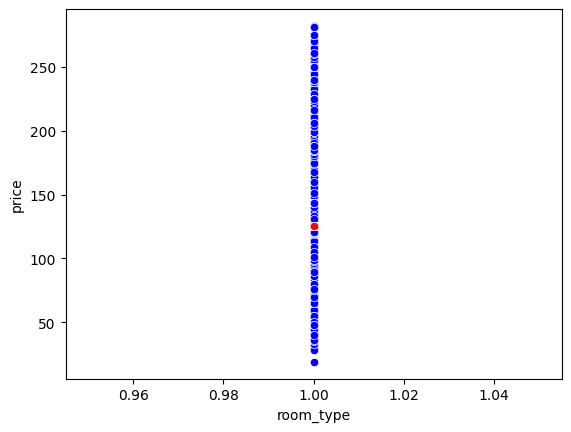

In [65]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='room_type', y='price', color="blue", data = f2)
sns.scatterplot(x='room_type', y='Pred_room', color="red", data = f2)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_response_rate', ylabel='price'>

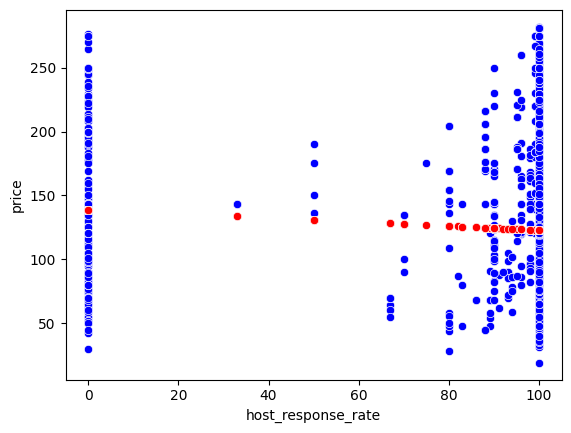

In [66]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_response_rate', y='price', color="blue", data = f2_copy)
sns.scatterplot(x='host_response_rate', y='Pred_response', color="red", data = f2_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

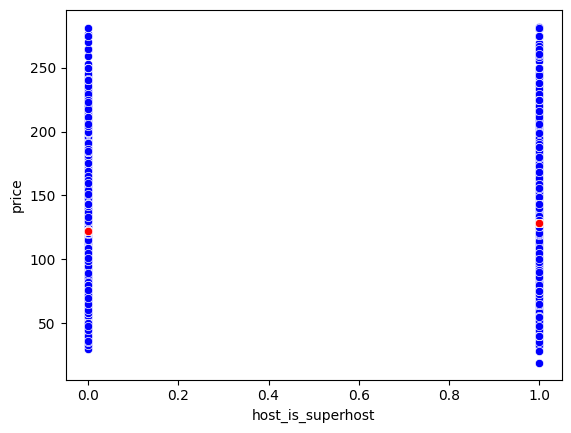

In [67]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data = f2_copy)
sns.scatterplot(x='host_is_superhost', y='Pred_superhost', color="red", data = f2_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

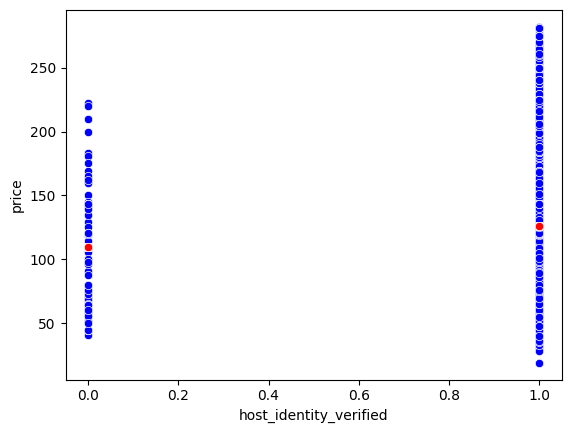

In [68]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data = f2_copy)
sns.scatterplot(x='host_identity_verified', y='Pred_identity', color="red", data = f2_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='instant_bookable', ylabel='price'>

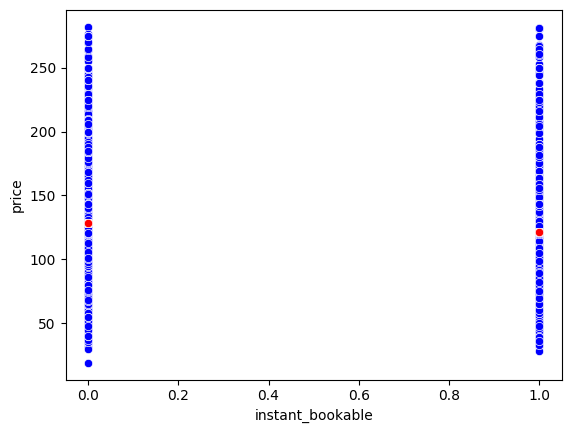

In [69]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data = f2_copy)
sns.scatterplot(x='instant_bookable', y='Pred_bookable', color="red", data = f2_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

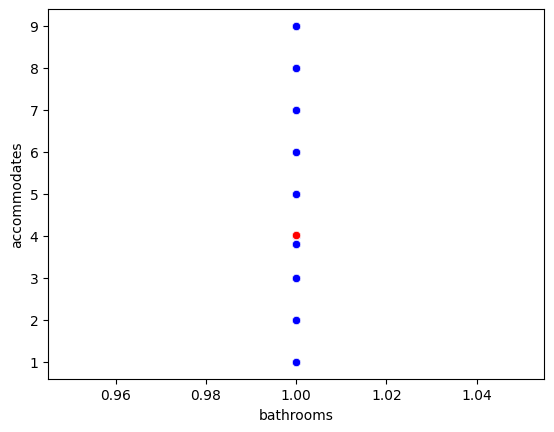

In [70]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data = f2_copy)
sns.scatterplot(x='bathrooms', y='Pred_bathrooms', color="red", data = f2_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

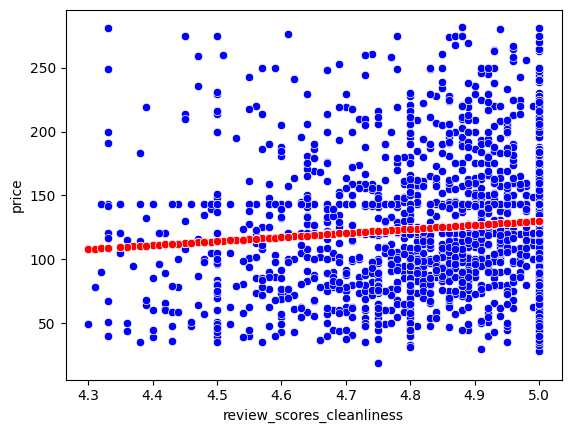

In [71]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data = f2_copy)
sns.scatterplot(x='review_scores_cleanliness', y='Pred_cleanliness', color="red", data = f2_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='property_type', ylabel='price'>

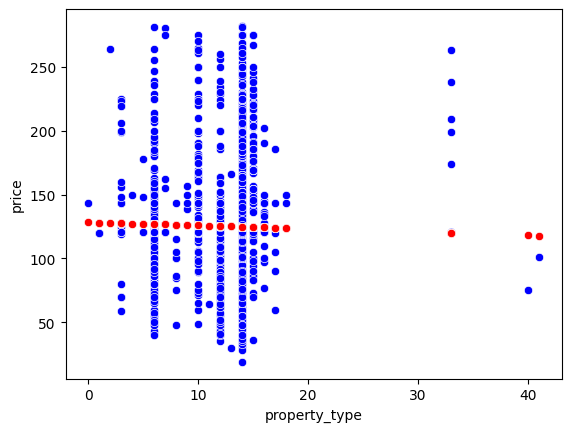

In [72]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='property_type', y='price', color="blue", data = f2_copy)
sns.scatterplot(x='property_type', y='Pred_property', color="red", data = f2_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

In [73]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.010706382068417786

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

0.0033478509920391586

In [76]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Vars_Indep4, y=Vars_Dep4)
coef_Deter4

0.0036020634809325047

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.004087552596663491

In [78]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.0

In [79]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Vars_Indep7, y=Vars_Dep7)
coef_Deter7

0.009809531819560013

In [80]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Vars_Indep8, y=Vars_Dep8)
coef_Deter8

0.00028114108569110563

In [81]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [82]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.10347164862133872)

In [83]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.057860616934484535)

In [84]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.060017193211049986)

In [85]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.06393397059985788)

In [86]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.0)

In [87]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.09904308062434253)

In [88]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.0167672623195054)

In [89]:
#Graficamos todas las despersiones entre todas las variables
#sns.pairplot(f2)

In [90]:
#Analizar categorias de una columna
df6 = f2.groupby(['room_type'])['room_type'].count()
df6

room_type
1    1970
Name: room_type, dtype: int64

In [91]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=f2.corr()
Corr_Factors

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.232066,0.113390,0.056399,NaN,0.199680,0.016838,NaN,-0.103472,-0.040692
host_is_superhost,NaN,0.232066,1.000000,0.114378,-0.054057,NaN,0.055711,0.022568,NaN,0.057861,0.201678
host_identity_verified,NaN,0.113390,0.114378,1.000000,-0.023364,NaN,0.048750,-0.000524,NaN,0.060017,-0.095849
property_type,NaN,0.056399,-0.054057,-0.023364,1.000000,NaN,0.118837,-0.148277,NaN,-0.016767,-0.030515
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.199680,0.055711,0.048750,0.118837,NaN,1.000000,-0.017944,NaN,-0.063934,-0.099219
accommodates,NaN,0.016838,0.022568,-0.000524,-0.148277,NaN,-0.017944,1.000000,NaN,0.281917,-0.019407
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,-0.103472,0.057861,0.060017,-0.016767,NaN,-0.063934,0.281917,NaN,1.000000,0.099043


In [92]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors_pred=f2_copy.corr()
Corr_Factors_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,0.030515,NaN,0.118837,0.023364,0.054057,0.056399,-0.056399,0.054057,0.023364,-1.000000,NaN,-0.118837,0.148277,NaN,0.016767,0.030515
Pred_cleanliness,0.030515,1.000000,NaN,0.099219,-0.095849,0.201678,0.040692,-0.040692,0.201678,-0.095849,-0.030515,NaN,-0.099219,-0.019407,NaN,0.099043,1.000000
Pred_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pred_bookable,0.118837,0.099219,NaN,1.000000,-0.048750,-0.055711,0.199680,-0.199680,-0.055711,-0.048750,-0.118837,NaN,-1.000000,0.017944,NaN,0.063934,0.099219
Pred_identity,0.023364,-0.095849,NaN,-0.048750,1.000000,0.114378,-0.113390,0.113390,0.114378,1.000000,-0.023364,NaN,0.048750,-0.000524,NaN,0.060017,-0.095849
Pred_superhost,0.054057,0.201678,NaN,-0.055711,0.114378,1.000000,-0.232066,0.232066,1.000000,0.114378,-0.054057,NaN,0.055711,0.022568,NaN,0.057861,0.201678
Pred_response,0.056399,0.040692,NaN,0.199680,-0.113390,-0.232066,1.000000,-1.000000,-0.232066,-0.113390,-0.056399,NaN,-0.199680,-0.016838,NaN,0.103472,0.040692
host_response_rate,-0.056399,-0.040692,NaN,-0.199680,0.113390,0.232066,-1.000000,1.000000,0.232066,0.113390,0.056399,NaN,0.199680,0.016838,NaN,-0.103472,-0.040692
host_is_superhost,0.054057,0.201678,NaN,-0.055711,0.114378,1.000000,-0.232066,0.232066,1.000000,0.114378,-0.054057,NaN,0.055711,0.022568,NaN,0.057861,0.201678
host_identity_verified,0.023364,-0.095849,NaN,-0.048750,1.000000,0.114378,-0.113390,0.113390,0.114378,1.000000,-0.023364,NaN,0.048750,-0.000524,NaN,0.060017,-0.095849


In [93]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.232066,0.113390,0.056399,NaN,0.199680,0.016838,NaN,0.103472,0.040692
host_is_superhost,NaN,0.232066,1.000000,0.114378,0.054057,NaN,0.055711,0.022568,NaN,0.057861,0.201678
host_identity_verified,NaN,0.113390,0.114378,1.000000,0.023364,NaN,0.048750,0.000524,NaN,0.060017,0.095849
property_type,NaN,0.056399,0.054057,0.023364,1.000000,NaN,0.118837,0.148277,NaN,0.016767,0.030515
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.199680,0.055711,0.048750,0.118837,NaN,1.000000,0.017944,NaN,0.063934,0.099219
accommodates,NaN,0.016838,0.022568,0.000524,0.148277,NaN,0.017944,1.000000,NaN,0.281917,0.019407
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,0.103472,0.057861,0.060017,0.016767,NaN,0.063934,0.281917,NaN,1.000000,0.099043


In [94]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1_pred=abs(Corr_Factors_pred)
Corr_Factors1_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,0.030515,NaN,0.118837,0.023364,0.054057,0.056399,0.056399,0.054057,0.023364,1.000000,NaN,0.118837,0.148277,NaN,0.016767,0.030515
Pred_cleanliness,0.030515,1.000000,NaN,0.099219,0.095849,0.201678,0.040692,0.040692,0.201678,0.095849,0.030515,NaN,0.099219,0.019407,NaN,0.099043,1.000000
Pred_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pred_bookable,0.118837,0.099219,NaN,1.000000,0.048750,0.055711,0.199680,0.199680,0.055711,0.048750,0.118837,NaN,1.000000,0.017944,NaN,0.063934,0.099219
Pred_identity,0.023364,0.095849,NaN,0.048750,1.000000,0.114378,0.113390,0.113390,0.114378,1.000000,0.023364,NaN,0.048750,0.000524,NaN,0.060017,0.095849
Pred_superhost,0.054057,0.201678,NaN,0.055711,0.114378,1.000000,0.232066,0.232066,1.000000,0.114378,0.054057,NaN,0.055711,0.022568,NaN,0.057861,0.201678
Pred_response,0.056399,0.040692,NaN,0.199680,0.113390,0.232066,1.000000,1.000000,0.232066,0.113390,0.056399,NaN,0.199680,0.016838,NaN,0.103472,0.040692
host_response_rate,0.056399,0.040692,NaN,0.199680,0.113390,0.232066,1.000000,1.000000,0.232066,0.113390,0.056399,NaN,0.199680,0.016838,NaN,0.103472,0.040692
host_is_superhost,0.054057,0.201678,NaN,0.055711,0.114378,1.000000,0.232066,0.232066,1.000000,0.114378,0.054057,NaN,0.055711,0.022568,NaN,0.057861,0.201678
host_identity_verified,0.023364,0.095849,NaN,0.048750,1.000000,0.114378,0.113390,0.113390,0.114378,1.000000,0.023364,NaN,0.048750,0.000524,NaN,0.060017,0.095849


<Axes: >

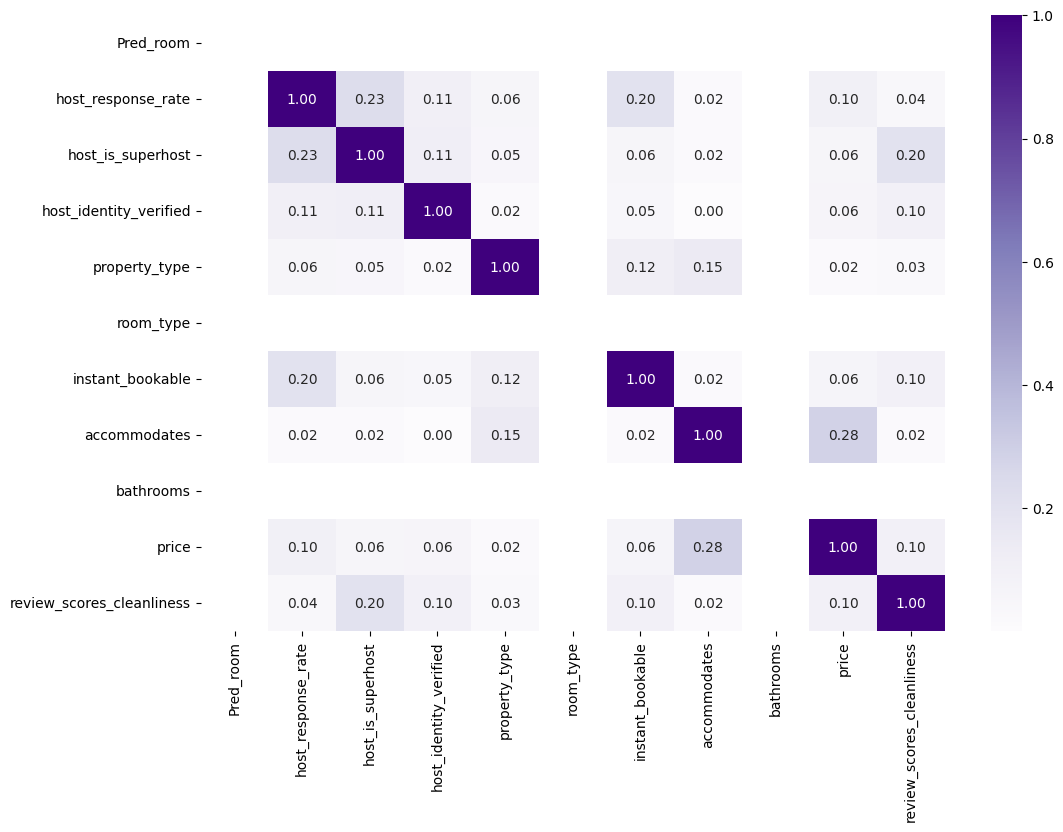

In [95]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

<Axes: >

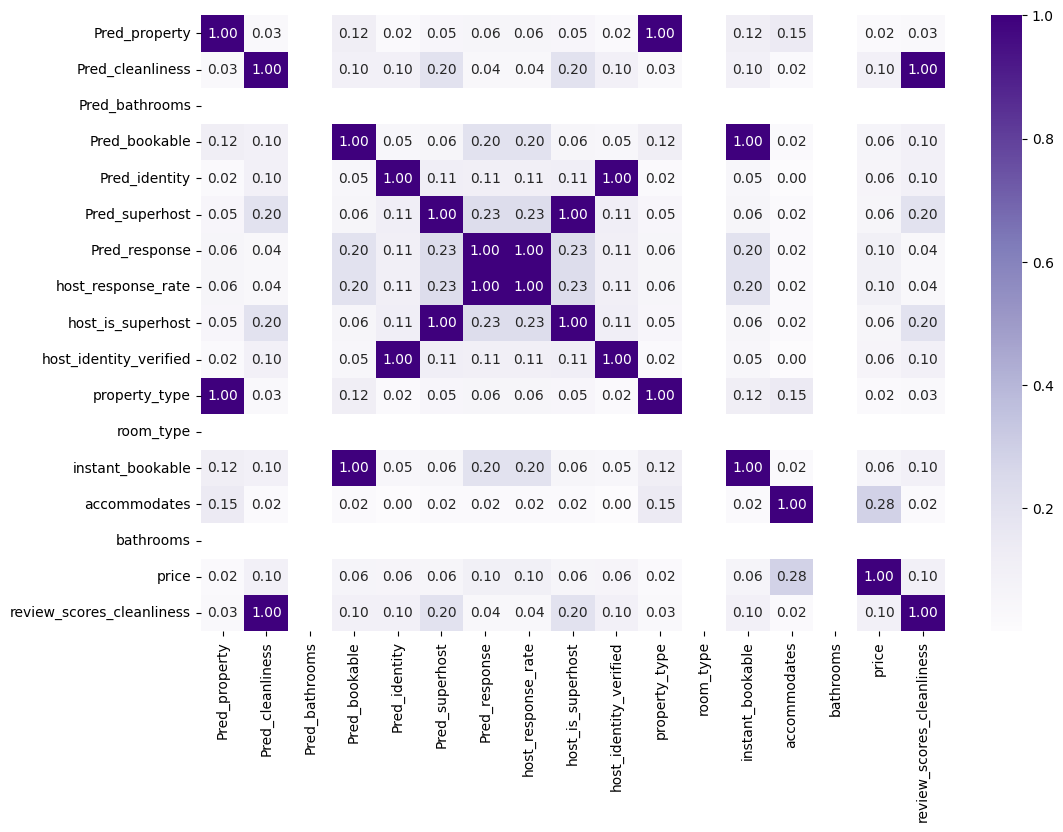

In [97]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1_pred, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap